# Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data Set

In [20]:
cloth_data =pd.read_csv("Company_Data.csv")
cloth_data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Performing Exploratory Data Analysis

<AxesSubplot:>

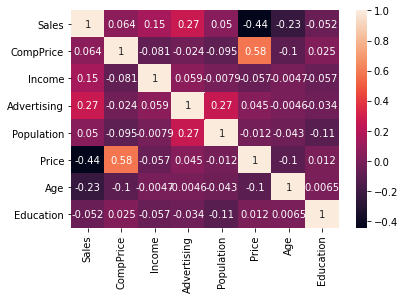

In [21]:
sns.heatmap(cloth_data .corr(),annot=True)

# converting sales into categorical data 

In [22]:
np.median(cloth_data["Sales"]) 

7.49

In [23]:
cloth_data["sales"]="<=7.49"
cloth_data.loc[cloth_data["Sales"]>=7.49,"sales"]=">=7.49"

In [5]:
cloth_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,>=7.49
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,<=7.49
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,<=7.49
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,<=7.49


# Converting Alphabetical into Binary

In [6]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cloth_data["ShelveLoc"]=lb.fit_transform(cloth_data["ShelveLoc"])
cloth_data["Urban"]=lb.fit_transform(cloth_data["Urban"])
cloth_data["US"]=lb.fit_transform(cloth_data["US"])
cloth_data["sales"]=lb.fit_transform(cloth_data["sales"])


In [7]:
cloth_data.drop(["Sales"],inplace=True,axis=1)
cloth_data['sales'].unique()
cloth_data.sales.value_counts()

1    201
0    199
Name: sales, dtype: int64

In [8]:
colnames = list(cloth_data.columns)
predictors = colnames[:10]
target = colnames[10]

# Training and Testing the Data Set

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cloth_data, test_size = 0.3)

# Importing Decission tree Classifier

In [10]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy')

# Test Data Accuracy

In [11]:
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,43,21
1,18,38


In [12]:
np.mean(preds == test[target])

0.675

#  Train Data Accuracy

In [13]:
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])



Predictions,0,1
Actual,,
0,135,0
1,0,145


In [14]:
np.mean(preds == train[target])

1.0